# 8. Logistic Regression by Numpy

First, we would import the necessary libraries.

In [1]:
#necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics
import math
import random


## 0.1 Reading the Data 

First, we will create a data frame of given data set based on giving description file.

In [2]:
#reading the data frame
tick_tock_toe= pd.read_csv('tic-tac-toe (1).data', sep=',',names=["top-left-square",
"Top Middle Square",
"Top Right Square",
"Middle Left Square",
"Middle Middle Squares",
"Middle Right Square",
"Bottom Left Square",
"Bottom Middle Square",
"Bottom Right Square",
"Class" ], na_values="?")
       

In [3]:
tick_tock_toe

,top-left-square,Top Middle Square,Top Right Square,Middle Left Square,Middle Middle Squares,Middle Right Square,Bottom Left Square,Bottom Middle Square,Bottom Right Square,Class
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive
...,...,...,...,...,...,...,...,...,...,...
953,o,x,x,x,o,o,o,x,x,negative
954,o,x,o,x,x,o,x,o,x,negative
955,o,x,o,x,o,x,x,o,x,negative
956,o,x,o,o,x,x,x,o,x,negative


## 0.2 Checking Existence Of NaN Values

In [4]:
tick_tock_toe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   top-left-square        958 non-null    object
 1   Top Middle Square      958 non-null    object
 2   Top Right Square       958 non-null    object
 3   Middle Left Square     958 non-null    object
 4   Middle Middle Squares  958 non-null    object
 5   Middle Right Square    958 non-null    object
 6   Bottom Left Square     958 non-null    object
 7   Bottom Middle Square   958 non-null    object
 8   Bottom Right Square    958 non-null    object
 9   Class                  958 non-null    object
dtypes: object(10)
memory usage: 75.0+ KB


According to the info, there is no any NaN values.

## 0.3 Converting Data to Numeric Values 

Now, we will convert any non-numerical data to numerical values.

In [5]:
#converting object values to numeric values
tick_tock_toe_hot = pd.get_dummies(tick_tock_toe)

#displaying the new table
tick_tock_toe_hot

,top-left-square_b,top-left-square_o,top-left-square_x,Top Middle Square_b,Top Middle Square_o,Top Middle Square_x,Top Right Square_b,Top Right Square_o,Top Right Square_x,Middle Left Square_b,...,Bottom Left Square_o,Bottom Left Square_x,Bottom Middle Square_b,Bottom Middle Square_o,Bottom Middle Square_x,Bottom Right Square_b,Bottom Right Square_o,Bottom Right Square_x,Class_negative,Class_positive
0,0,0,1,0,0,1,0,0,1,0,...,0,1,0,1,0,0,1,0,0,1
1,0,0,1,0,0,1,0,0,1,0,...,1,0,0,0,1,0,1,0,0,1
2,0,0,1,0,0,1,0,0,1,0,...,1,0,0,1,0,0,0,1,0,1
3,0,0,1,0,0,1,0,0,1,0,...,1,0,1,0,0,1,0,0,0,1
4,0,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,0,1,0,0,0,1,0,0,1,0,...,1,0,0,0,1,0,0,1,1,0
954,0,1,0,0,0,1,0,1,0,0,...,0,1,0,1,0,0,0,1,1,0
955,0,1,0,0,0,1,0,1,0,0,...,0,1,0,1,0,0,0,1,1,0
956,0,1,0,0,0,1,0,1,0,0,...,0,1,0,1,0,0,0,1,1,0


## 0.4 Unbalanced Data


### 0.4.1 Number Of Sample in Each Class

In [6]:
#number of samples in each class
print('Number of Sample in Class 1= ',tick_tock_toe_hot[tick_tock_toe_hot['Class_positive']==1].shape[0])
print('Number of Sample in Class 0= ',tick_tock_toe_hot[tick_tock_toe_hot['Class_positive']==0].shape[0])

Number of Sample in Class 1=  626
Number of Sample in Class 0=  332


### 0.4.2 Ratio Of Number of Samples in Each Classess

In [7]:

print('Ratio of Number of Samples in Class 1= ',round(tick_tock_toe_hot[tick_tock_toe_hot['Class_positive']==1].shape[0]/tick_tock_toe_hot.shape[0],2))
print('Ratio of Number of Samples in Class 0= ',round(tick_tock_toe_hot[tick_tock_toe_hot['Class_positive']==0].shape[0]/tick_tock_toe_hot.shape[0],2))

Ratio of Number of Samples in Class 1=  0.65
Ratio of Number of Samples in Class 0=  0.35


According to ratios, %65 of data is positive and %35 of data is negative. The ratio must be %50 for each class. For this reason, we will have sample set which the ratio of each class is %50. So we can choose 332 samples for each class and we can concatanete them.

## 0.5 Stratified Sampling

In this part, I will choose 330 samples from each class (positive and negative).

### 0.5.1 Creating Two Stratas

In [8]:
#data samples that have negative class
negative_class_data = tick_tock_toe_hot[tick_tock_toe_hot['Class_negative']==1]
negative_class_data

,top-left-square_b,top-left-square_o,top-left-square_x,Top Middle Square_b,Top Middle Square_o,Top Middle Square_x,Top Right Square_b,Top Right Square_o,Top Right Square_x,Middle Left Square_b,...,Bottom Left Square_o,Bottom Left Square_x,Bottom Middle Square_b,Bottom Middle Square_o,Bottom Middle Square_x,Bottom Right Square_b,Bottom Right Square_o,Bottom Right Square_x,Class_negative,Class_positive
626,0,0,1,0,0,1,0,1,0,0,...,1,0,1,0,0,0,1,0,1,0
627,0,0,1,0,0,1,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
628,0,0,1,0,0,1,0,1,0,0,...,1,0,0,1,0,0,1,0,1,0
629,0,0,1,0,0,1,0,1,0,0,...,1,0,0,1,0,1,0,0,1,0
630,0,0,1,0,0,1,0,1,0,0,...,1,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,0,1,0,0,0,1,0,0,1,0,...,1,0,0,0,1,0,0,1,1,0
954,0,1,0,0,0,1,0,1,0,0,...,0,1,0,1,0,0,0,1,1,0
955,0,1,0,0,0,1,0,1,0,0,...,0,1,0,1,0,0,0,1,1,0
956,0,1,0,0,0,1,0,1,0,0,...,0,1,0,1,0,0,0,1,1,0


In [9]:
#data samples that have positive class
positive_class_data = tick_tock_toe_hot[tick_tock_toe_hot['Class_positive']==1]
positive_class_data


,top-left-square_b,top-left-square_o,top-left-square_x,Top Middle Square_b,Top Middle Square_o,Top Middle Square_x,Top Right Square_b,Top Right Square_o,Top Right Square_x,Middle Left Square_b,...,Bottom Left Square_o,Bottom Left Square_x,Bottom Middle Square_b,Bottom Middle Square_o,Bottom Middle Square_x,Bottom Right Square_b,Bottom Right Square_o,Bottom Right Square_x,Class_negative,Class_positive
0,0,0,1,0,0,1,0,0,1,0,...,0,1,0,1,0,0,1,0,0,1
1,0,0,1,0,0,1,0,0,1,0,...,1,0,0,0,1,0,1,0,0,1
2,0,0,1,0,0,1,0,0,1,0,...,1,0,0,1,0,0,0,1,0,1
3,0,0,1,0,0,1,0,0,1,0,...,1,0,1,0,0,1,0,0,0,1
4,0,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,1,0,0,1,0,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,1
622,1,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1
623,1,0,0,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,1
624,1,0,0,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,1


In [10]:
#strata 1
strata_negative = negative_class_data.sample(330)

#strata 2
strata_positive = positive_class_data.sample(330)

### 0.5.2 Checking  Created Stratas Dimension

In [11]:
print(strata_negative.shape)
print(strata_positive.shape)

(330, 29)
(330, 29)


### 0.5.2 Creating The Balanced Data Set

Now. to have balanced data, we will concatenate 2 stratas. This data set consists 330 negative and 330 positive class samples.

In [12]:
balanced_data =pd.concat([strata_negative,strata_positive])
#balanced_data = pd.DataFrame.reset_index(balanced_data_non_index)#
balanced_data

,top-left-square_b,top-left-square_o,top-left-square_x,Top Middle Square_b,Top Middle Square_o,Top Middle Square_x,Top Right Square_b,Top Right Square_o,Top Right Square_x,Middle Left Square_b,...,Bottom Left Square_o,Bottom Left Square_x,Bottom Middle Square_b,Bottom Middle Square_o,Bottom Middle Square_x,Bottom Right Square_b,Bottom Right Square_o,Bottom Right Square_x,Class_negative,Class_positive
915,1,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0
817,0,1,0,0,1,0,0,1,0,0,...,1,0,0,0,1,0,0,1,1,0
760,0,1,0,0,0,1,0,0,1,0,...,0,1,0,0,1,0,1,0,1,0
721,0,0,1,1,0,0,0,1,0,0,...,1,0,1,0,0,1,0,0,1,0
922,1,0,0,0,1,0,0,1,0,0,...,0,1,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,0,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1
275,0,0,1,1,0,0,1,0,0,0,...,0,1,0,1,0,0,1,0,0,1
506,1,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,1,0,1
573,1,0,0,0,1,0,0,1,0,1,...,0,1,0,0,1,0,0,1,0,1


## 0.6 Train and Test Set

### 0.6.1 Defining a Train and Test Function

In [13]:
#for choosing random sample
from random import randint

In [14]:
#input = data and train test ration
#outout = train and test set of data
def train_test_set(data, train_ratio):
    train_set =[]
    test_set =[]
    l = list(range(0,int(data.shape[0])))
    number_of_sample=random.sample(l, int(data.shape[0]*train_ratio))
    
    for j in range(0,660):
        if j in number_of_sample:
            train_set.append(data.iloc[j])
        else:
            test_set.append(data.iloc[j])
    return pd.DataFrame(train_set),pd.DataFrame(test_set)
        
    

In [15]:
test_set = train_test_set(balanced_data,0.8)[1]
test_set

,top-left-square_b,top-left-square_o,top-left-square_x,Top Middle Square_b,Top Middle Square_o,Top Middle Square_x,Top Right Square_b,Top Right Square_o,Top Right Square_x,Middle Left Square_b,...,Bottom Left Square_o,Bottom Left Square_x,Bottom Middle Square_b,Bottom Middle Square_o,Bottom Middle Square_x,Bottom Right Square_b,Bottom Right Square_o,Bottom Right Square_x,Class_negative,Class_positive
754,0,1,0,0,0,1,0,0,1,0,...,0,1,1,0,0,0,1,0,1,0
755,0,1,0,0,0,1,0,0,1,0,...,1,0,0,0,1,1,0,0,1,0
673,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,1,0,0,1,0
630,0,0,1,0,0,1,0,1,0,0,...,1,0,1,0,0,0,1,0,1,0
823,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,0,0,1,0,1,0,0,1,0,0,...,0,1,0,0,1,0,1,0,0,1
359,0,1,0,0,0,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,1
93,0,0,1,0,0,1,0,1,0,0,...,1,0,1,0,0,0,0,1,0,1
110,0,0,1,0,0,1,1,0,0,0,...,1,0,0,1,0,0,0,1,0,1


### 0.6.2 Train and Test Sets of the Data

In [16]:
#train set of balanced data 

train_set,test_set = train_test_set(balanced_data,0.8)


train_set_x = np.array(train_set.iloc[:,:27])
train_set_y =np.array( train_set.iloc[:,28:]) 

#test set of balanced data
test_set_x = np.array(test_set.iloc[:,:27])
test_set_y=np.array(test_set.iloc[:,28:])

### 0.6.3 Checking the dimension of Train and Test Set

In [17]:
print(train_set_x.shape)
print(train_set_y.shape)
print(test_set_x.shape)
print(test_set_y.shape)

(528, 27)
(528, 1)
(132, 27)
(132, 1)


# EXERCISE 1:
# LOGISTIC REGRESSION WITH GD

## 1.1 Definition of the Functions


### 1.1.1 Logistic Regression

In [171]:
#defining the logaritma function
def logaritma_function(x):
     return 1/(1 + np.exp(-x))

### 1.1.2 Logaritma Likelihood Function 


In [19]:
import math

In [172]:
#defining the logaritma likelihood function
def log_likelihood(x,y,beta):
    for i in range(0,x.shape[0]):
        total = 0
        total = total + y[i]*(x[i].reshape((x.shape[1],1))).T @ beta - math.log(1+math.exp(((x[i].reshape((x.shape[1],1))).T@beta)))
    return total

### 1.1.3 Logistic Regression with Gradient Descent

In [150]:
def learn_logreg_ga_with_bd(x,y, mu, t_max,mu_minus,mu_plus):
    beta = np.zeros((x.shape[1],1))
    log_likelihood_list =[]
    log_loss = []
    for i in range(0,t_max):
        y_prediction =np.zeros((x.shape[0],1))
        for j in range(0,x.shape[0]):
            a = (x[j].reshape((x.shape[1],1))).T @beta
            y_prediction[j]=logaritma_function(a)
        
        
        beta_new = beta + mu*x.T@(y-y_prediction)
        log_likelihood_list.append(float(log_likelihood(x,y,beta_new)-log_likelihood(x,y,beta)))
        log_loss.append(float(log_likelihood(x,y,beta_new)))
       
        
        
        if log_likelihood(x,y,beta)>=log_likelihood(x,y,beta_new):
            mu = mu*mu_minus
        else:
            mu = mu*mu_plus
            
        beta = beta_new
    return log_likelihood_list, log_loss
        

### 1.1.4 Logistic Regression with Gradient Descent Test

In [149]:
def learn_logreg_ga_with_bd(x,y, mu, t_max,mu_minus,mu_plus,x_test,y_test):
    beta = np.zeros((x.shape[1],1))
    log_likelihood_list =[]
    log_loss = []
    for i in range(0,t_max):
        y_prediction =np.zeros((x.shape[0],1))
        for j in range(0,x.shape[0]):
            a = (x[j].reshape((x.shape[1],1))).T @beta
            y_prediction[j]=logaritma_function(a)
        
        
        beta_new = beta + mu*x.T@(y-y_prediction)
        log_likelihood_list.append(float(log_likelihood(x_test,y_test,beta_new)-log_likelihood(x_test,y_test,beta)))
        log_loss.append(float(log_likelihood(x_test,y_test,beta_new)))
       
        
        
        if log_likelihood(x,y,beta)>=log_likelihood(x,y,beta_new):
            mu = mu*mu_minus
        else:
            mu = mu*mu_plus
            
        beta = beta_new
    return log_likelihood_list, log_loss
        

## 1.2 Maximizing The Loglikelihood Function

### 1.3.1 Logistic Regression with GA and Bolddriver in Train Set

In [49]:
error_loglikelihood_one = learn_logreg_ga_with_bd(train_set_x,train_set_y,0.001,500,0.01,1.01)

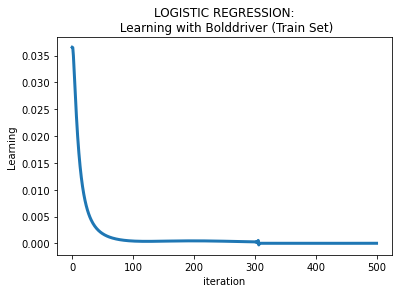

In [50]:
plt.plot(error_loglikelihood_one[0],linewidth=3)
plt.title('LOGISTIC REGRESSION:\n Learning with Bolddriver (Train Set)')
plt.xlabel('iteration')
plt.ylabel('Learning')
plt.show()

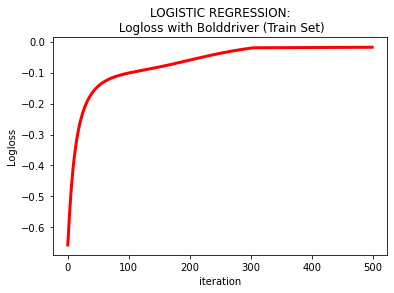

In [51]:
plt.plot(error_loglikelihood_one[1],'r',linewidth=3)
plt.title('LOGISTIC REGRESSION:\n Logloss with Bolddriver (Train Set)')
plt.xlabel('iteration')
plt.ylabel('Logloss')
plt.show()


### 1.3.2 Logistic Regression with GA and Bolddriver in Test Set

In [56]:
error_loglikelihood_one_test=learn_logreg_ga_with_bd_test(train_set_x,train_set_y,0.001,500,0.01,1.01,test_set_x,test_set_y)

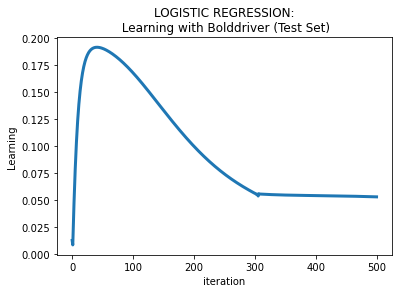

In [57]:
plt.plot(error_loglikelihood_one_test[0],linewidth=3)
plt.title('LOGISTIC REGRESSION:\n Learning with Bolddriver (Test Set)')
plt.xlabel('iteration')
plt.ylabel('Learning')
plt.show()

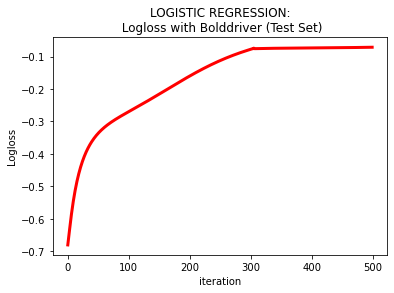

In [58]:
plt.plot(error_loglikelihood_one_test[1],'r',linewidth=3)
plt.title('LOGISTIC REGRESSION:\n Logloss with Bolddriver (Test Set)')
plt.xlabel('iteration')
plt.ylabel('Logloss')
plt.show()

# EXERCISE 2:

# IMPLEMENT NEWTON ALGORITHM TO LR

## 2.1 Definitons of the Functions 

### 2.1.1 Linear Regression

In [64]:
#defining the logaritma function
def logaritma_function(x):
     return 1/(1 + np.exp(-x))

### 2.1.2 Loglikelihood

In [122]:
#defining the logaritma likelihood function
def log_likelihood(x,y,beta):
    for i in range(0,x.shape[0]):
        total = 0
        total = total + y[i]*(x[i].reshape((x.shape[1],1))).T @ beta - np.log(1+np.exp(((x[i].reshape((x.shape[1],1))).T@beta)))
    return total

### 2.1.3 Diagonalization of a Vector:

To translate a vector to diganola matrix, now we define a new function

In [123]:
def dia(vector):
    dimension = vector.shape[0]
    W = np.zeros((dimension,dimension))
    for i in range(0,dimension):
        W[i][i]=vector[i]
    return W    

### 2.1.4 Multiplication of Two Vector

In [124]:
def mult(vec_one,vec_two):  
    dimen = vec_one.shape[0]
    vector =np.zeros((dimen,1))
    for k in range(0,dimen):
        vector[k]=vec_one[k]*vec_two[k]
    return vector
        

### 2.1.5 Newton Method For Logistic Regression For Train Set

In [154]:
def newton_method(x,y,beta,mu,i_max):
    log_likelihood_newton =[]
    learning_newton = []
    for i in range(0,i_max):
        #calculating prediction vector
        y_hat=np.zeros((x.shape[0],1))
        for j in range(0,x.shape[0]):
            a =(x[j].reshape((x.shape[1],1))).T @beta
            y_hat[j]=logaritma_function(a)
        
        Y = mult(y_hat,1-y_hat)
        W = dia(Y)
        alt = np.linalg.pinv(x.T@ W @ x)
        
        ust = x.T @(y-y_hat)
        
        beta_next = beta + mu* alt@ust
        
        log_likelihood_newton.append(float(log_likelihood(x,y,beta_next)))
        learning_newton.append(float(abs(log_likelihood(x,y,beta_next)-log_likelihood(x,y,beta))))
       
        beta = beta_next
    
    
    return log_likelihood_newton,learning_newton

### 2.1.5 Newton Method For Logistic Regression For Test Set

In [165]:
def newton_method_test(x,y,beta,mu,i_max,x_test,y_test):
    log_likelihood_newton =[]
    learning_newton = []
    for i in range(0,i_max):
        #calculating prediction vector
        y_hat=np.zeros((x.shape[0],1))
        for j in range(0,x.shape[0]):
            a =(x[j].reshape((x.shape[1],1))).T @beta
            y_hat[j]=logaritma_function(a)
        
        Y = mult(y_hat,1-y_hat)
        W = dia(Y)
        alt = np.linalg.pinv(x.T@ W @ x)
        
        ust = x.T @(y-y_hat)
        
        beta_next = beta + mu* alt@ust
        
        log_likelihood_newton.append(float(log_likelihood(x_test,y_test,beta_next)))
        learning_newton.append(float(abs(log_likelihood(x_test,y_test,beta_next)-log_likelihood(x_test,y_test,beta))))
       
        beta = beta_next
    
    
    return log_likelihood_newton,learning_newton

## 2.2 Logistic Regression with Newton Method at Train

In [142]:
b=np.ones((27,1))
example_two = newton_method(train_set_x,train_set_y,b,0.0000001,500)

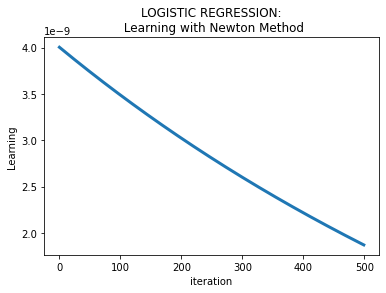

In [159]:
plt.plot(example_two[1],linewidth=3)
plt.title('LOGISTIC REGRESSION:\n Learning with Newton Method')
plt.xlabel('iteration')
plt.ylabel('Learning')
plt.show()

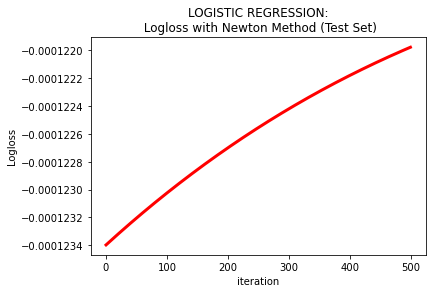

In [160]:
plt.plot(example_two[0],'r',linewidth=3)
plt.title('LOGISTIC REGRESSION:\n Logloss with Newton Method (Test Set)')
plt.xlabel('iteration')
plt.ylabel('Logloss')
plt.show()

## 2.2 Logistic Regression with Newton Method at Test

In [158]:
example_three =newton_method_test(train_set_x,train_set_y,b,0.0000001,500,test_set_x,test_set_y)

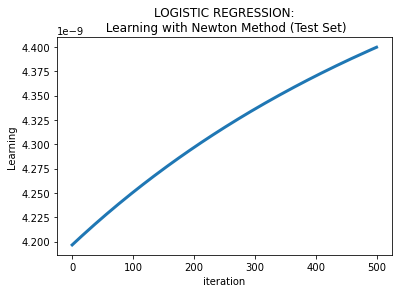

In [170]:
plt.plot(example_three[1],linewidth=3)
plt.title('LOGISTIC REGRESSION:\n Learning with Newton Method (Test Set)')
plt.xlabel('iteration')
plt.ylabel('Learning')
plt.show()

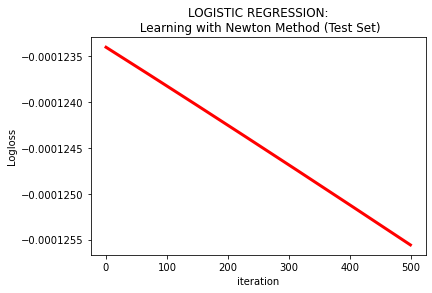

In [169]:
plt.plot(example_three[0],'r',linewidth=3)
plt.title('LOGISTIC REGRESSION:\n Learning with Newton Method (Test Set)')
plt.xlabel('iteration')
plt.ylabel('Logloss')
plt.show()

# CONCLUSION

1.Newton method is expensive to use. It took time to calculate.

2.While using Newton method there is a smooth way(always approach to ekstremum), while GA with bolddriver has not have smooth way (sometimes far away but  at the end approaches).

3. Newton method in the training set performance very well and quickly approach to ekstremum while it doesnot give goo result on test set.

4. GD performance very well on train and test set.